In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# read trees as matrix. https://stackoverflow.com/questions/4315506/load-csv-into-2d-matrix-with-numpy-for-plotting
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
trees.shape

(50000, 7)

In [42]:
trees.head()

,0,1,2,3,4,5,6
0,1.207652,1.207652,1.593392,6.139258,0.38574,0.000000,0.000000
1,2.093894,0.852455,0.852455,2.093894,0.00000,0.000000,1.779641
2,2.287441,1.534422,1.534422,2.006191,0.00000,0.000000,0.471769
3,2.399569,0.629763,0.629763,4.712063,0.00000,0.000000,1.769806
4,1.524985,2.408900,1.524985,4.543632,0.00000,0.883915,0.000000


In [88]:
# try k-means.https://koalatea.io/python-plot-kmeans-clusters/
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state=0)
label = model.fit_predict(trees)
label_df = pd.DataFrame(label, columns = ["label"])
label_df

,label
0,0
1,1
2,1
3,1
4,1
...,...
49995,1
49996,1
49997,1
49998,1


In [89]:
label_0 = trees[label == 0]
label_1 = trees[label == 1]
label_0

,0,1,2,3,4,5,6
0,1.207652,1.207652,1.593392,6.139258,0.385740,0.000000,0.000000
6,1.477797,1.165187,1.165187,4.925605,0.000000,0.000000,0.312611
10,0.559148,1.343810,0.559148,8.129684,0.000000,0.784662,0.000000
16,1.027981,1.027981,2.068973,5.187987,1.040993,0.000000,0.000000
22,1.518090,1.210372,1.210372,9.467802,0.000000,0.000000,0.307718
...,...,...,...,...,...,...,...
49979,1.032331,1.032331,1.858614,6.412065,0.826283,0.000000,0.000000
49982,0.525403,1.605250,0.525403,5.778756,0.000000,1.079847,0.000000
49984,1.086841,1.086841,1.146297,5.227283,0.059456,0.000000,0.000000
49993,0.635498,1.496730,0.635498,8.237412,0.000000,0.861232,0.000000


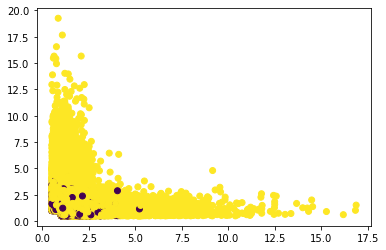

In [90]:
import matplotlib.pyplot as plot

#get cols
trees_0 = trees.iloc[:,0]
trees_1 = trees.iloc[:,1]

plot.scatter(trees_0, trees_1, c= label)

In [91]:
# test normalization. https://www.datacamp.com/tutorial/principal-component-analysis-in-python
from sklearn.preprocessing import StandardScaler

x = trees.values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(-4.222653972517167e-17, 0.9999999999999999)

In [92]:
title = [0,1,2,3,4,5,6]
normal_tree = pd.DataFrame(x, columns = title)
normal_tree.head()

,0,1,2,3,4,5,6
0,-0.338846,-0.333475,0.327649,1.174701,0.271630,-0.457130,-0.463396
1,0.546846,-0.678156,-0.503776,-0.866201,-0.287404,-0.457130,1.358438
2,0.740273,-0.016380,0.261477,-0.910447,-0.287404,-0.457130,0.019558
3,0.852331,-0.894255,-0.753665,0.454676,-0.287404,-0.457130,1.348370
4,-0.021710,0.832208,0.250888,0.369702,-0.287404,0.435895,-0.463396


In [108]:
# test PCA
from sklearn.decomposition import PCA
pca_tree = PCA(n_components = 2)
principal_tree = pca_tree.fit_transform(x)
pca = pd.DataFrame(principal_tree, columns = ["feature0" ,"feature1"])
pca.head()

,feature0,feature1
0,-0.017964,0.283746
1,1.536363,-0.499718
2,0.618019,0.316460
3,1.779240,-0.971244
4,-0.876220,-0.075991


In [109]:
final_df = pd.concat([pca,label_df], axis = 1)
final_df.head()

,feature0,feature1,label
0,-0.017964,0.283746,0
1,1.536363,-0.499718,1
2,0.618019,0.316460,1
3,1.779240,-0.971244,1
4,-0.876220,-0.075991,1


<AxesSubplot:xlabel='feature0', ylabel='feature1'>

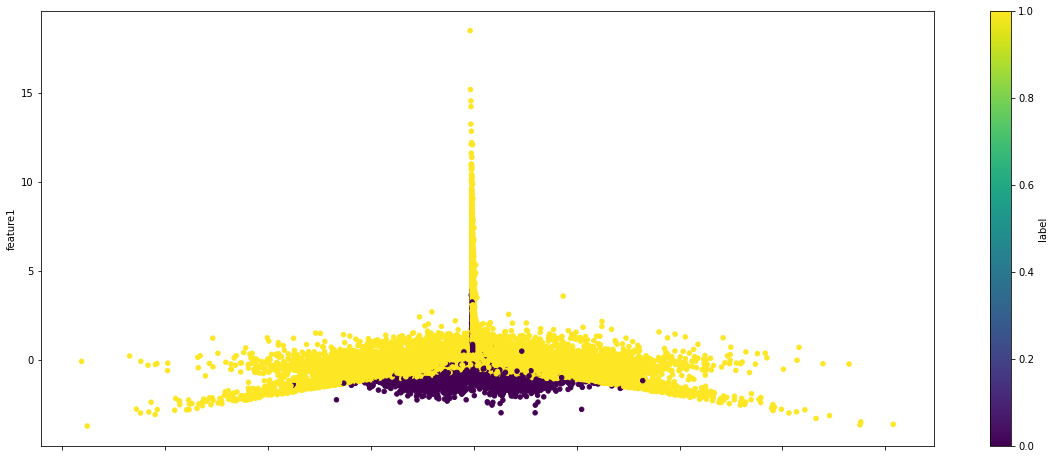

In [116]:
final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))